# DBSCAN ALGORITHM

loading the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

we generate the dataset using the make_blobs() i.e, the artifical data

In [116]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features= 2, centers= 2, cluster_std= 1.8, random_state= 101)
X[:5], y[:5]

(array([[-10.92660663,  -7.45866124],
        [ -4.59861772,   4.15396354],
        [ -6.42629587,  -3.90530101],
        [-12.51744816,  -4.13948445],
        [-11.37652837,  -6.57020581]]), array([1, 0, 1, 1, 1]))

* Here X contains the artifical data generated using the make_blobs()
* y contains the labelled set of values which shows to which clusters the points belongs to

Text(0, 0.5, 'X[1]')

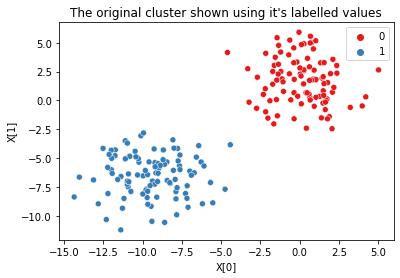

In [117]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette= 'Set1')
plt.title("The original cluster shown using it's labelled values")
plt.xlabel("X[0]")
plt.ylabel("X[1]")
# This is how the cluster should like like using the labelled data as shown

*Now using DBSCAN Algorithm*

In [118]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.3, min_samples=4)
# intializing the DBSCAN model with epsolen/ radius of neighbourhood value with 1 and minimim number of neighbourhood with 13

In [119]:
db.fit(X)
#Training the model

DBSCAN(eps=1.3, min_samples=4)

In [120]:
labels = db.labels_
labels[:10]

array([ 0, -1,  0,  0,  0,  1,  0,  1,  1,  1], dtype=int64)

In [121]:
y[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [122]:
print("Number of clusters :", len(np.unique(labels)))
print("Estimated number of noise points :", np.sum(np.array(labels) == -1, axis=0))

Number of clusters : 3
Estimated number of noise points : 17


Text(0, 0.5, 'X[1]')

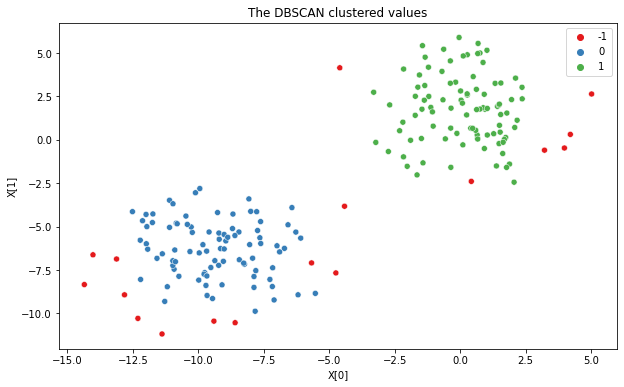

In [123]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=db.labels_, palette= 'Set1')
plt.title("The DBSCAN clustered values")
plt.xlabel("X[0]")
plt.ylabel("X[1]")

To find the optimal value of epsilon we use nearest neighbours

Calculate the average distance between each point in the data set and its 20 nearest neighbors 

In [108]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

Sort distance values by ascending value and plot

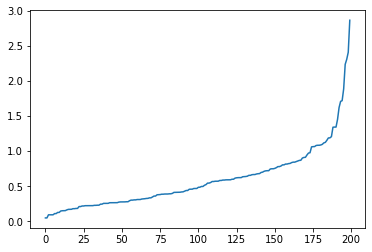

In [109]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

elbow point seems like 1.3